# STAT3006 Assignment 4 <img src="https://i.kym-cdn.com/photos/images/newsfeed/001/852/165/c6e" height="32" width="32">

**Avatar Putra Pertama Azka - 47286238**

In [36]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import StandardScaler

# training utils
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict, GridSearchCV

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# single variable analysis
from scipy.stats import ttest_ind, false_discovery_control

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from time import time

# visualization
from matplotlib import pyplot as plt
import plotly.express as px

import seaborn as sns

# Dataset bizzzz

In [17]:
features: pd.DataFrame = pd.read_csv("data/Aaroe.csv", index_col=0)
labels: pd.DataFrame = pd.read_csv("data/Aaroelabels.csv")

In [18]:
features.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
100002,0.1134,0.0560,-0.2562,0.1638,0.2423,0.6244,0.5118,0.6083,-0.1223,0.3054,...,0.1386,-0.2830,-0.4520,-0.2199,0.3305,0.0104,-0.4842,0.1371,0.5243,-0.7144
100037,0.2036,-0.2881,0.3000,-0.1245,-0.1931,0.6167,0.3156,0.1385,-0.1324,-0.0705,...,-0.0941,-0.1529,-0.2488,-0.0012,0.2233,-0.0586,-0.3079,-0.3399,-0.1787,-0.4291
100058,-0.1888,-0.1852,-0.5350,0.0004,-0.1942,0.5297,-0.0255,0.5359,0.4558,0.4745,...,-0.0046,-0.2142,-0.1024,0.0988,-0.3493,0.3408,-0.0091,-0.0199,-0.0292,-0.5355
100079,0.4796,0.1218,-0.4838,0.0131,0.2402,0.2539,0.4935,0.6921,0.0927,0.4592,...,0.1737,-0.0121,-0.3563,-0.3899,-0.3027,-0.0069,-0.3533,0.0783,0.1998,-0.8642
100100,-0.4458,-0.0933,-0.2071,0.0706,-0.2367,0.1844,0.0015,-0.3982,-0.0905,-0.1620,...,-0.2226,-0.1462,-0.2799,0.1476,-0.0923,0.0413,-0.2852,0.0443,0.1640,-0.3789


In [19]:
labels.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
0,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer


In [20]:
print(features.shape)
print(labels.shape)

(11217, 121)
(1, 121)


## Preprocessing

In [21]:
ft = features.T
cols = ft.columns
idx = ft.index

scaler = StandardScaler()
ft_scaled = scaler.fit_transform(ft.to_numpy())

X = pd.DataFrame(ft_scaled, columns=cols, index=idx)
Y = labels.T.rename(columns={0: "label"})

In [22]:
data = X.join(Y['label'])

In [23]:
data.to_csv("data/processed.csv")

In [24]:
data.shape

(121, 11218)

In [25]:
X.isna().any().any()

False

In [26]:
CLASSNAMES = {
    'normal': 0,
    'cancer': 1
}

# 1. PCA on Gene Expression Dataset

Explained Variance: 0.9999999999999992
# of PCs: 121


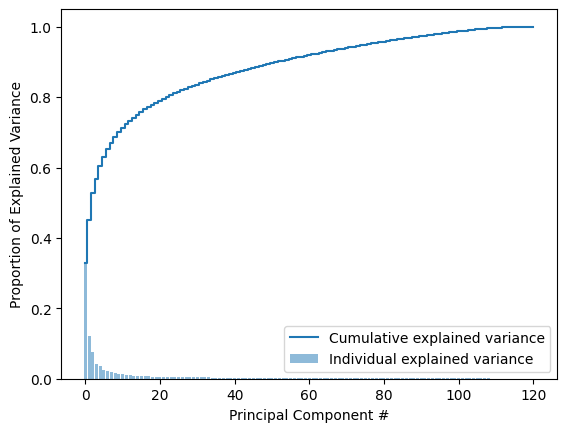

In [27]:
pca = PCA()
x = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")
print(f"# of PCs: {pca.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')

plt.show()

Explained Variance: 0.6046409033512566
# of PCs: 5


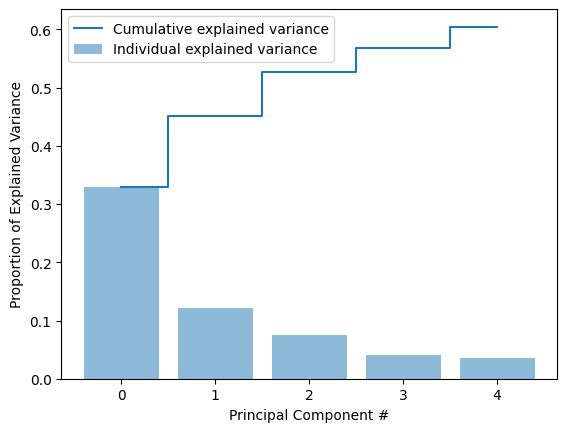

[[ 7.03889982e+00 -1.11376612e+01 -2.64387514e+01  7.15471137e+00
   1.27972287e+01]
 [-3.29241034e+01  1.15047619e+01  2.58841299e+00  1.82908426e+00
   2.15926427e+01]
 [-4.72069183e+01 -1.10714779e+01 -1.17805560e+01  3.18193227e+00
   9.98766579e+00]
 [-7.95810934e+00  7.66986604e+00  9.99025017e+00 -1.24982549e+01
  -4.45077413e+00]
 [-2.28120212e+00  5.99872732e+00 -7.11057000e+00 -8.85114079e+00
  -8.34096093e-01]
 [ 3.74232100e+01 -1.43890648e+01  8.52252347e+00  7.46795649e+00
   6.40964662e+00]
 [ 1.51562672e+01 -7.05639567e+00 -6.15639765e+00 -1.31813711e+01
   3.15632812e+00]
 [ 2.96231856e+01  3.27291587e+01 -2.68096676e+00 -3.46771751e-01
   1.41776504e+01]
 [ 9.96208243e+00  1.03713326e+01  1.94310215e+00  2.28760324e+01
   1.06431137e+01]
 [ 4.67623640e+01  1.85891748e+01 -4.95995317e+00  1.09856829e+01
   3.68790974e+00]
 [-9.59060415e+00 -8.70091983e-01  1.18813135e+01 -1.06975203e+01
  -8.00293436e+00]
 [ 5.75396707e-01 -9.51990476e-01  1.91768045e+01  9.41056243e-01

In [28]:
# oh no duplication anyway
n_components = 5
pca_first_n = PCA(n_components=n_components)
first_n = pca_first_n.fit_transform(X)

explained_variance = pca_first_n.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca_first_n.explained_variance_ratio_)}")
print(f"# of PCs: {pca_first_n.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')

plt.show()

# TODO: figure out how to identify relevant PCs
labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'label'

print(first_n)

fig = px.scatter_matrix(
    first_n,
    color=Y['label'],
    dimensions=range(n_components),
    labels=labels,
    title=f'First {n_components} PCs, Total Explained Variance: {sum(pca_first_n.explained_variance_ratio_):.2f}%',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [29]:
components = pd.DataFrame(pca.components_, columns=X.columns)
components.to_csv('supplementary/PrincipalComponentDirections.csv', index_label="Principal Component")

# Experiments

In [30]:
# quick accuracy test
svm = SVC(kernel="linear")
cv = LeaveOneOut()
# NOTE: SVM Hyperparameters?
grid = GridSearchCV(svm, {}, cv=cv, scoring="accuracy")
grid.fit(x, Y.to_numpy().ravel())
print(grid.best_score_)

# score = cross_val_score(lasso, x, Y.to_numpy().ravel(), scoring='accuracy', cv=10, n_jobs=-1)

# print(f"Accuracy: {np.mean(score):.3f} ({np.std(score):.3f})")

0.7520661157024794


# 2. Single Variable Analysis

In [92]:
class SVA:
    def __init__(self, data: pd.DataFrame) -> None:
        label = data['label']
        self.n_variables = len(data.columns) - 1 # exclude response variable
        self.normals = data.loc[label == 'normal'].drop('label', axis='columns')
        self.cancers = data.loc[label == 'cancer'].drop('label', axis='columns')
        self.calcPvals()
        self.adjustPvals()
        self.df_unadjusted = pd.Series(self.pvals, index=data.drop('label', axis='columns').columns)
        self.df_adjusted = pd.Series(self.pvals_adjusted, index=data.drop('label', axis='columns').columns)

    def calcPvals(self):
        ttresults = ttest_ind(self.normals, self.cancers, equal_var=False)
        self.pvals = ttresults.pvalue

    def adjustPvals(self):
        # TODO: how does this work?
        self.pvals_adjusted = false_discovery_control(self.pvals, method='bh')

In [99]:
MAX_FDR = 0.1
sva = SVA(data)
# sva.pvals_adjusted[sva.pvals_adjusted < MAX_FDR]
significant_genes = sva.df_unadjusted[sva.df_adjusted < MAX_FDR]
significant_genes.to_csv('supplementary/SignificantGenes.csv', header=False)

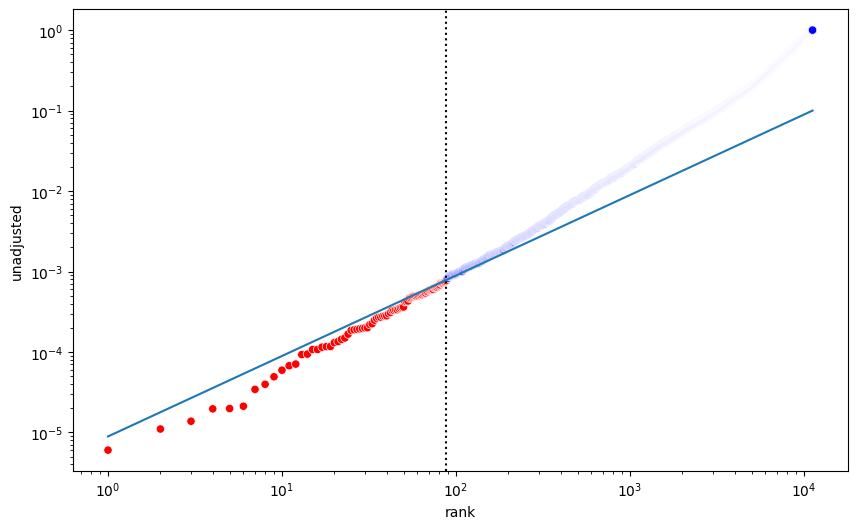

In [135]:
genes = pd.DataFrame({"unadjusted": sva.pvals, "adjusted": sva.pvals_adjusted}, index=X.columns)
genes_sorted = genes.sort_values(by=['unadjusted'])
genes_sorted['significant'] = np.where(genes_sorted['adjusted'] < MAX_FDR, 'red', 'blue')
genes_sorted['rank'] = range(1, len(genes_sorted) + 1)

def fdr_slope(j):
    return MAX_FDR * j / len(genes)

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=genes_sorted, x='rank', y='unadjusted', c=genes_sorted['significant'])
# sns.lineplot(data=genes_sorted, x='adjusted', y='adjusted')
plt.axvline(x=len(significant_genes), c='black', linestyle=':')

xx = [1, len(genes)]
yy = [fdr_slope(1), fdr_slope(len(genes))]

plt.plot(xx, yy, '-')
# TODO: BH FDR control line
plt.xscale('log')
plt.yscale('log')
plt.show()

In [116]:
len(genes)

11217

# 3. Defining Binary Logistic Regression With Lasso Penalty

# 4. Benefits & Drawbacks of using PCA for Dimensionality Reduction

# 5. Classification

## a. Characterisation of Each Class

## b. CV-based Error Rate Estimates

## c. Finding The Optimal Value of λ

# 6. Results Comparison